In [1]:
import numpy as np

# Defining the loss function L(p) with a given value of a
def loss_function(p, a):
    return np.sin(2 * p) + a * np.sin(4 * p)

# Defining the gradient of the loss function
def gradient(p, a):
    return 2 * np.cos(2 * p) + 4 * a * np.cos(4 * p)

#Defining the Optimizer functions sgd, momentum, nesterov momentum, adagrad, rmsprop, adam
def sgd(p, lr, grad):
    return p - lr * grad

def momentum(p, lr, grad, prev_momentum, beta):
    momentum = beta * prev_momentum + lr * grad
    return p - momentum

def nesterov_momentum(p, lr, grad, prev_momentum, beta):
    lookahead_momentum = prev_momentum * beta + lr * gradient(p - beta * prev_momentum, a)
    return p - lookahead_momentum

def adagrad(p, lr, grad, G, epsilon):
    G += np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    return p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat


#Calling each optimizers with loops and conditions
def optimize(optimizer, a, lr, initial_p, target_error, max_steps, beta):
    p = initial_p
    grad = gradient(p, a)
    steps = 0
    epsilon = 1e-7
    decay = 0.9

    if optimizer == adagrad or optimizer == rmsprop:
        G = np.zeros_like(grad)

    if optimizer == adam:
        m = np.zeros_like(grad)
        v = np.zeros_like(grad)
        beta1 = 0.9
        beta2 = 0.999
        t = 0

    prev_momentum = 0

    while steps < max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * np.square(grad)
            t += 1
            m_hat = m / (1 - beta1 ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        elif optimizer == adagrad:
            p = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            G = decay * G + (1 - decay) * np.square(grad)
            p = p - (lr / np.sqrt(G + epsilon)) * grad

        elif optimizer == momentum:
            p = optimizer(p, lr, grad, prev_momentum, beta)  # Include prev_momentum for momentum
            prev_momentum = p - prev_p  # Update prev_momentum

        elif optimizer == nesterov_momentum:
            lookahead_momentum = prev_momentum * beta + lr * gradient(p - beta * prev_momentum, a)
            p = p - lookahead_momentum
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

        grad = gradient(p, a)
        steps += 1

        # Stopping criterion
        if np.abs(loss_function(prev_p, a) - loss_function(p, a)) < target_error:
            break

    return p, steps

# Testing with different values of a and learning rates
a_values = [0.499, 0.501]
learning_rates = [0.1, 0.01, 0.001]
initial_p = 0.75
target_error = 1e-13
max_steps = 10000

#Printing the results
for a in a_values:
    for lr in learning_rates:
        print(f"Testing optimizer for a = {a}, learning rate = {lr}")
        for optimizer in [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]:
            print(optimizer.__name__)
            result_p, steps = optimize(optimizer, a, lr, initial_p, target_error, max_steps, beta=0.9)
            print(f"{optimizer.__name__}: Minimum found at p = {result_p}, Steps = {steps}")

Testing optimizer for a = 0.499, learning rate = 0.1
sgd
sgd: Minimum found at p = 2.617801150048571, Steps = 151
momentum
momentum: Minimum found at p = 1.8542071371576947, Steps = 10000
nesterov_momentum
nesterov_momentum: Minimum found at p = 2.6178011575928775, Steps = 16
adagrad
adagrad: Minimum found at p = 2.6178008423933603, Steps = 1125
rmsprop
rmsprop: Minimum found at p = 2.666339436858488, Steps = 10000
adam
adam: Minimum found at p = 2.6178015488842235, Steps = 286
Testing optimizer for a = 0.499, learning rate = 0.01
sgd
sgd: Minimum found at p = 2.6178008915128057, Steps = 1574
momentum
momentum: Minimum found at p = 2.6178007514159654, Steps = 2995
nesterov_momentum
nesterov_momentum: Minimum found at p = 2.6178011268972967, Steps = 150
adagrad
adagrad: Minimum found at p = 1.5297634857655606, Steps = 10000
rmsprop
rmsprop: Minimum found at p = 2.6178011290628906, Steps = 262
adam
adam: Minimum found at p = 2.617801286162574, Steps = 1150
Testing optimizer for a = 0.499

Testing the Optimizers for the Six Hump Camel Function

sgd: Minimized L = -0.9999999999999902, Steps = 459
momentum: Minimized L = -1.0, Steps = 1235
nesterov_momentum: Minimized L = -0.999999999999987, Steps = 342
adagrad: Minimized L = -0.9999999755566163, Steps = 10000
rmsprop: Minimized L = -1.0032681852903569, Steps = 10000
adam: Minimized L = -0.9999999999999895, Steps = 568


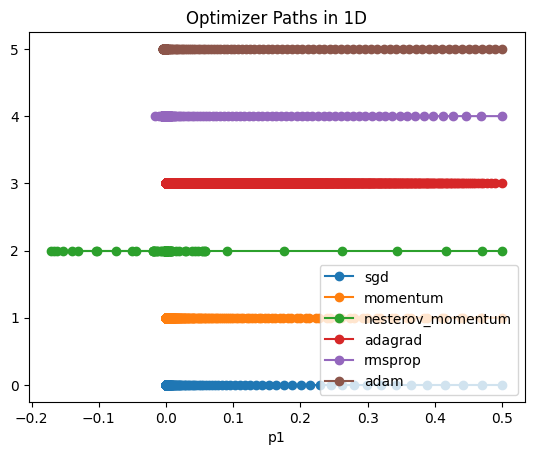

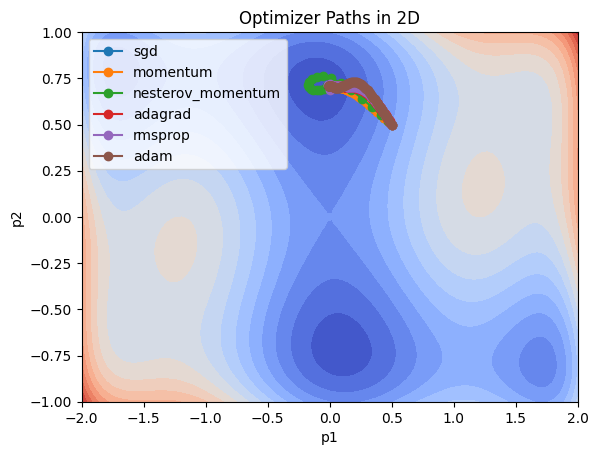

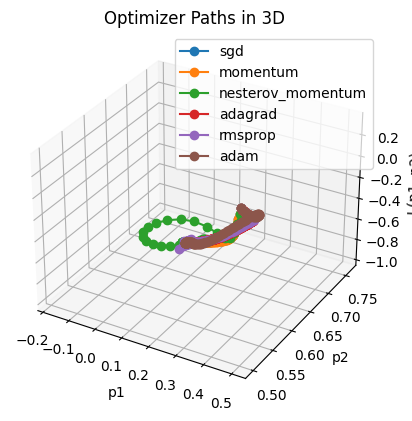

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining the Six Hump Camel Function
def six_hump_camel(p):
    x, y = p
    term1 = (4 - 2.1 * x**2 + x**4 / 3) * x**2
    term2 = x * y
    term3 = (-4 + 4 * y**2) * y**2
    return term1 + term2 + term3

# Defining the gradient of the Six Hump Camel Function
def gradient_six_hump_camel(p):
    x, y = p
    grad_x = 2 * (4 - 2.1 * x**2 + x**4 / 3) * x - 2 * x * y
    grad_y = x**2 - 8 * y + 16 * y**3
    return np.array([grad_x, grad_y])

# Defining the optimizer functions
def sgd(p, lr, grad):
    return p - lr * grad

def momentum(p, lr, grad, prev_momentum, beta):
    momentum = beta * prev_momentum + lr * grad
    return p - momentum

def nesterov_momentum(p, lr, grad, prev_momentum, beta):
    lookahead_momentum = prev_momentum * beta + lr * gradient_six_hump_camel(p - beta * prev_momentum)
    return p - lookahead_momentum

def adagrad(p, lr, grad, G, epsilon):
    G += np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    return p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

def optimize(optimizer, lr, initial_p, target_error, max_steps, beta=0.9, decay=0.9):
    p = initial_p
    grad = gradient_six_hump_camel(p)
    steps = 0
    epsilon = 1e-7

    if optimizer == adagrad or optimizer == rmsprop:
        G = np.zeros_like(grad)

    if optimizer == adam:
        m = np.zeros_like(grad)
        v = np.zeros_like(grad)
        beta1 = 0.9
        beta2 = 0.999
        t = 0

    prev_momentum = 0
    result_path = [p]

    while steps < max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * np.square(grad)
            t += 1
            m_hat = m / (1 - beta1 ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        elif optimizer == adagrad:
            p = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            G = decay * G + (1 - decay) * np.square(grad)
            p = p - (lr / np.sqrt(G + epsilon)) * grad

        elif optimizer == momentum:
            p = optimizer(p, lr, grad, prev_momentum, beta)
            prev_momentum = p - prev_p

        elif optimizer == nesterov_momentum:
            lookahead_momentum = prev_momentum * beta + lr * gradient_six_hump_camel(p - beta * prev_momentum)
            p = p - lookahead_momentum
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

        grad = gradient_six_hump_camel(p)
        steps += 1

        result_path.append(p)

        # Stopping criterion
        if np.linalg.norm(prev_grad) < target_error:
            break

    return result_path, steps

# Visualizations
def plot_trajectory_1d(paths):
    plt.figure()
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [i] * len(result_path)  # Create a y value for the optimizer path
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('p1')
    plt.title('Optimizer Paths in 1D')
    plt.legend()
    plt.show()

def plot_trajectory_2d(paths):
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = six_hump_camel((X, Y))

    plt.figure()
    plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('p1')
    plt.ylabel('p2')
    plt.title('Optimizer Paths in 2D')
    plt.legend()
    plt.show()

def plot_trajectory_3d(paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        z = [six_hump_camel(p) for p in result_path]
        ax.plot(x, y, z, 'o-', label=optimizer)
    ax.set_xlabel('p1')
    ax.set_ylabel('p2')
    ax.set_zlabel('L(p1, p2)')
    ax.set_title('Optimizer Paths in 3D')
    ax.legend()
    plt.show()

# Initial point and stopping criterion
initial_point = np.array([0.5, 0.5])
target_error = 1e-13
max_steps = 10000

optimizers = [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]

optimizer_paths_1d = []
optimizer_paths_2d = []
optimizer_paths_3d = []

#Printing the results
for optimizer in optimizers:
    result_path, steps = optimize(optimizer, 0.01, initial_point, target_error, max_steps, beta=0.9, decay=0.9)
    print(f"{optimizer.__name__}: Minimized L = {six_hump_camel(result_path[-1])}, Steps = {steps}")
    optimizer_paths_1d.append((optimizer.__name__, result_path))
    optimizer_paths_2d.append((optimizer.__name__, result_path))
    optimizer_paths_3d.append((optimizer.__name__, result_path))

#Plotting 1D, 2D and 3D plots
plot_trajectory_1d(optimizer_paths_1d)
plot_trajectory_2d(optimizer_paths_2d)
plot_trajectory_3d(optimizer_paths_3d)


Testing the Optimizers for the Michalewicz function

sgd (m=10): Minimized Michalewicz = -1.7865774292714214, Steps = 1000
momentum (m=10): Minimized Michalewicz = -0.9956711586236754, Steps = 1000
nesterov_momentum (m=10): Minimized Michalewicz = -2.4709350697482093e-08, Steps = 1000
adagrad (m=10): Minimized Michalewicz = -0.43807682952812993, Steps = 1000
rmsprop (m=10): Minimized Michalewicz = -0.5273255556903927, Steps = 1000
adam (m=10): Minimized Michalewicz = -0.8757525642445266, Steps = 187


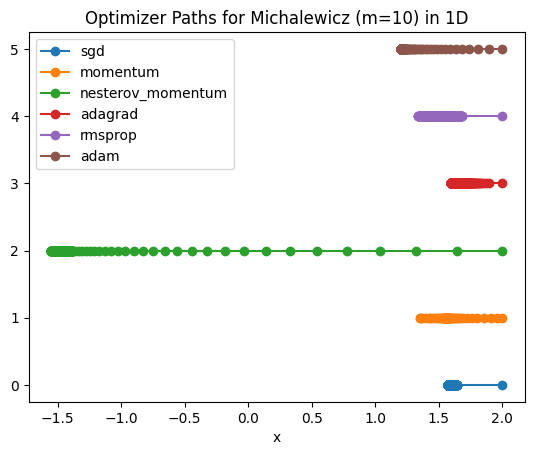

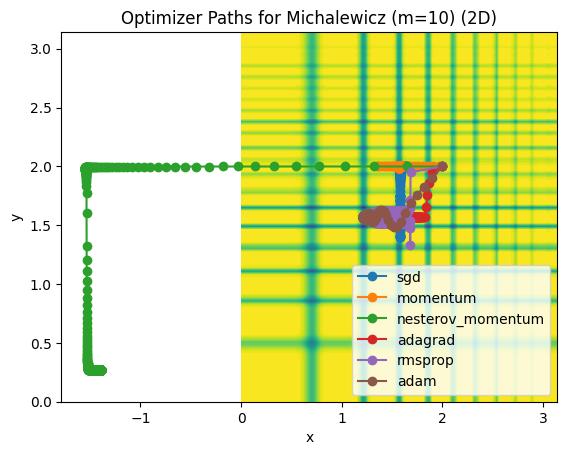

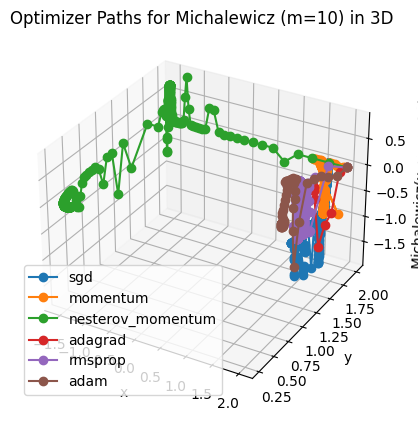

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining the Michalewicz Function
def michalewicz(p, m):
    x, y = p
    term1 = -np.sin(x) * (np.sin(m * x**2 / np.pi))**(2 * m)
    term2 = -np.sin(y) * (np.sin(2 * m * y**2 / np.pi))**(2 * m)
    return term1 + term2

# Defining the gradient of the Michalewicz Function (Numerical Approximation)
def gradient_michalewicz(p, m, delta=1e-6):
    x, y = p
    grad_x = (-2 * m * np.pi * np.cos(x) * (np.sin(x**2 / np.pi))**(2 * m - 1) * np.sin(x**2 / np.pi)) / np.pi - np.cos(x) * (np.sin(x**2 / np.pi))**(2 * m)
    grad_y = (-4 * m * np.pi * np.cos(y) * (np.sin(2 * y**2 / np.pi))**(2 * m - 1) * np.sin(2 * y**2 / np.pi)) / np.pi - np.cos(y) * (np.sin(2 * y**2 / np.pi))**(2 * m)
    return np.array([grad_x, grad_y])


# Defining the Optimization function for Michalewicz with a specific m
def optimize_michalewicz(optimizer, lr, initial_p, target_error, max_steps, m, beta=0.9, decay=0.9):
    p = initial_p
    grad = gradient_michalewicz(p, m)
    steps = 0
    epsilon = 1e-7

    if optimizer == adagrad or optimizer == rmsprop:
        G = np.zeros_like(grad)

    if optimizer == adam:
        m_values = np.zeros_like(grad)
        v = np.zeros_like(grad)
        beta1 = 0.9
        beta2 = 0.999
        t = 0

    prev_momentum = 0
    result_path = [p]

    while steps < max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m_values = beta1 * m_values + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * np.square(grad)
            t += 1
            m_hat = m_values / (1 - beta1 ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        elif optimizer == adagrad:
            p = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            G = decay * G + (1 - decay) * np.square(grad)
            p = p - (lr / np.sqrt(G + epsilon)) * grad

        elif optimizer == momentum:
            p = optimizer(p, lr, grad, prev_momentum, beta)
            prev_momentum = p - prev_p

        elif optimizer == nesterov_momentum:
            lookahead_momentum = prev_momentum * beta + lr * gradient_michalewicz(p, m)
            p = p - lookahead_momentum
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

        grad = gradient_michalewicz(p, m)
        steps += 1

        result_path.append(p)

        # Stopping criterion
        if np.linalg.norm(prev_grad) < target_error:
            break

    return result_path, steps

# Visualizations for Michalewicz
def plot_trajectory_michalewicz_1d(paths, m):
    plt.figure()
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [i] * len(result_path)
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.title(f'Optimizer Paths for Michalewicz (m={m}) in 1D')
    plt.legend()
    plt.show()

def plot_trajectory_michalewicz_2d(paths, m):
    x_range = np.linspace(0, np.pi, 100)
    y_range = np.linspace(0, np.pi, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = michalewicz((X, Y), m)

    plt.figure()
    plt.contourf(X, Y, Z, levels=50, cmap='viridis', extent=[0, np.pi, 0, np.pi])
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Optimizer Paths for Michalewicz (m={m}) (2D)')
    plt.legend()
    plt.show()

def plot_trajectory_michalewicz_3d(paths, m):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        z = [michalewicz(p, m) for p in result_path]
        ax.plot(x, y, z, 'o-', label=optimizer)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(f'Michalewicz(x, y, m={m})')
    ax.set_title(f'Optimizer Paths for Michalewicz (m={m}) in 3D')
    ax.legend()
    plt.show()

# Initial point and stopping criterion for Michalewicz
initial_point_michalewicz = np.array([2.0, 2.0])
target_error_michalewicz = 1e-5
max_steps_michalewicz = 1000

# Choose an m value for Michalewicz
m_michalewicz = 10

optimizers_michalewicz = [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]

optimizer_paths_1d_michalewicz = []
optimizer_paths_2d_michalewicz = []
optimizer_paths_3d_michalewicz = []

#Printing the results
for optimizer in optimizers_michalewicz:
    result_path, steps = optimize_michalewicz(optimizer, 0.1, initial_point_michalewicz, target_error_michalewicz, max_steps_michalewicz, m_michalewicz, beta=0.9, decay=0.9)
    print(f"{optimizer.__name__} (m={m_michalewicz}): Minimized Michalewicz = {michalewicz(result_path[-1], m_michalewicz)}, Steps = {steps}")
    optimizer_paths_1d_michalewicz.append((optimizer.__name__, result_path))
    optimizer_paths_2d_michalewicz.append((optimizer.__name__, result_path))
    optimizer_paths_3d_michalewicz.append((optimizer.__name__, result_path))

#Plotting 1D, 2D and 3D plots
plot_trajectory_michalewicz_1d(optimizer_paths_1d_michalewicz, m_michalewicz)
plot_trajectory_michalewicz_2d(optimizer_paths_2d_michalewicz, m_michalewicz)
plot_trajectory_michalewicz_3d(optimizer_paths_3d_michalewicz, m_michalewicz)


Testing the Optimizers for the Ackley function

sgd: Minimized L = 4.226335917596984, Steps = 1000
momentum: Minimized L = 3.57520045996499, Steps = 1000
nesterov_momentum: Minimized L = 9.998643019663163, Steps = 1000
adagrad: Minimized L = 0.006193300566178284, Steps = 1000
rmsprop: Minimized L = 0.328842204885309, Steps = 1000
adam: Minimized L = 0.06197461734025156, Steps = 1000


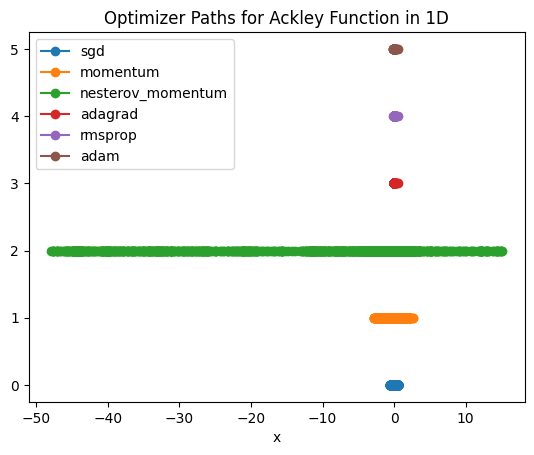

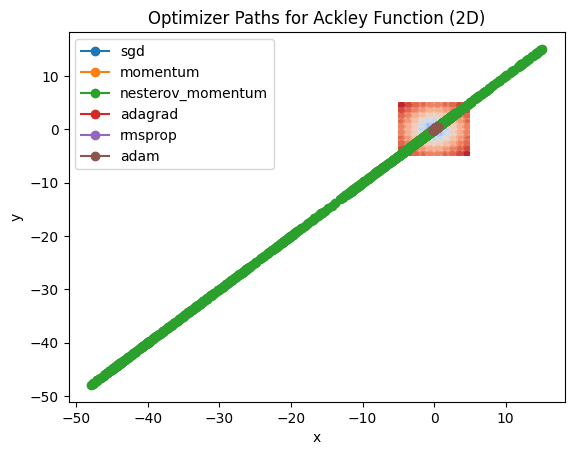

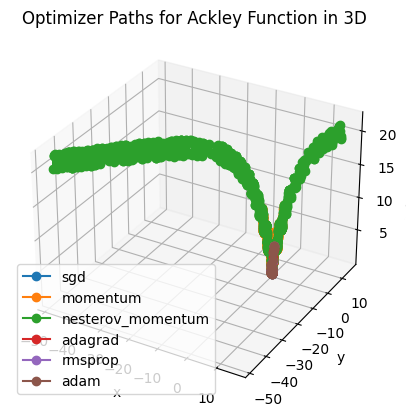

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining the Ackley Function
def ackley(p):
    x, y = p
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    return term1 + term2 + 20 + np.exp(1)

# Defining the gradient of the Ackley Function (Numerical Approximation)
def gradient_ackley(p, delta=1e-6):
    grad_x = (ackley([p[0] + delta, p[1]]) - ackley([p[0] - delta, p[1]])) / (2 * delta)
    grad_y = (ackley([p[0], p[1] + delta]) - ackley([p[0], p[1] - delta])) / (2 * delta)
    return np.array([grad_x, grad_y])

# Defining the Optimizer functions
def sgd(p, lr, grad):
    return p - lr * grad

def momentum(p, lr, grad, prev_momentum, beta):
    momentum = beta * prev_momentum + lr * grad
    return p - momentum

def nesterov_momentum(p, lr, grad, prev_momentum, beta):
    lookahead_momentum = prev_momentum * beta + lr * gradient_ackley(p - beta * prev_momentum)
    return p - lookahead_momentum

def adagrad(p, lr, grad, G, epsilon):
    G += np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    return p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

def optimize(optimizer, lr, initial_p, target_error, max_steps, beta=0.9, decay=0.9):
    p = initial_p
    grad = gradient_ackley(p)
    steps = 0
    epsilon = 1e-7

    if optimizer == adagrad or optimizer == rmsprop:
        G = np.zeros_like(grad)

    if optimizer == adam:
        m = np.zeros_like(grad)
        v = np.zeros_like(grad)
        beta1 = 0.9
        beta2 = 0.999
        t = 0

    prev_momentum = 0
    result_path = [p]

    while steps < max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * np.square(grad)
            t += 1
            m_hat = m / (1 - beta1 ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        elif optimizer == adagrad:
            p = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            G = decay * G + (1 - decay) * np.square(grad)
            p = p - (lr / np.sqrt(G + epsilon)) * grad

        elif optimizer == momentum:
            p = optimizer(p, lr, grad, prev_momentum, beta)
            prev_momentum = p - prev_p

        elif optimizer == nesterov_momentum:
            lookahead_momentum = prev_momentum * beta + lr * gradient_ackley(p - beta * prev_momentum)
            p = p - lookahead_momentum
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

        grad = gradient_ackley(p)
        steps += 1

        result_path.append(p)

        # Stopping criterion
        if np.linalg.norm(prev_grad) < target_error:
            break

    return result_path, steps

# Visualizations
def plot_trajectory_1d(paths):
    plt.figure()
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [i] * len(result_path)  # Create a y value for the optimizer path
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.title('Optimizer Paths for Ackley Function in 1D')
    plt.legend()
    plt.show()

def plot_trajectory_2d(paths):
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = ackley((X, Y))

    plt.figure()
    plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimizer Paths for Ackley Function (2D)')
    plt.legend()
    plt.show()

def plot_trajectory_3d(paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        z = [ackley(p) for p in result_path]
        ax.plot(x, y, z, 'o-', label=optimizer)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Ackley(x, y)')
    ax.set_title('Optimizer Paths for Ackley Function in 3D')
    ax.legend()
    plt.show()

# Initial point and stopping criterion
initial_point = np.array([0.5, 0.5])  # Change the initial point as needed
target_error = 1e-5  # Adjust the target error as needed
max_steps = 1000  # Adjust the maximum number of steps as needed

optimizers = [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]

optimizer_paths_1d = []
optimizer_paths_2d = []
optimizer_paths_3d = []

#Prining the results
for optimizer in optimizers:
    result_path, steps = optimize(optimizer, 0.1, initial_point, target_error, max_steps, beta=0.9, decay=0.9)
    print(f"{optimizer.__name__}: Minimized L = {ackley(result_path[-1])}, Steps = {steps}")
    optimizer_paths_1d.append((optimizer.__name__, result_path))
    optimizer_paths_2d.append((optimizer.__name__, result_path))
    optimizer_paths_3d.append((optimizer.__name__, result_path))

#Plotting 1D, 2D and 3D plots
plot_trajectory_1d(optimizer_paths_1d)
plot_trajectory_2d(optimizer_paths_2d)
plot_trajectory_3d(optimizer_paths_3d)


Testing the Optimizers for the Bohachevsky Function

sgd: Minimized Bohachevsky = 0.1828092451972111, Steps = 107
momentum: Minimized Bohachevsky = 0.34589324958120726, Steps = 10000
nesterov_momentum: Minimized Bohachevsky = 0.1828092451972112, Steps = 152
adagrad: Minimized Bohachevsky = 0.1828092451972111, Steps = 952
rmsprop: Minimized Bohachevsky = 0.18390790679333824, Steps = 10000
adam: Minimized Bohachevsky = 0.18280924519721103, Steps = 583


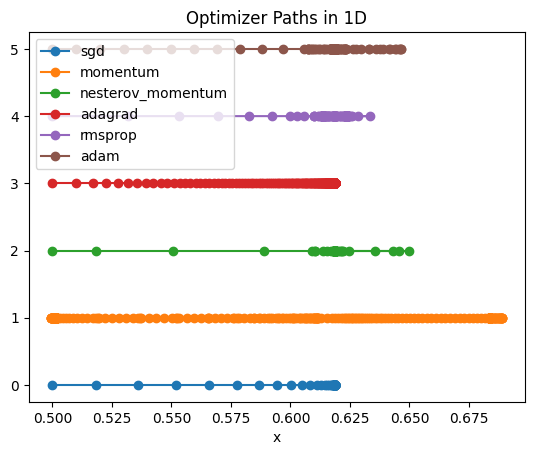

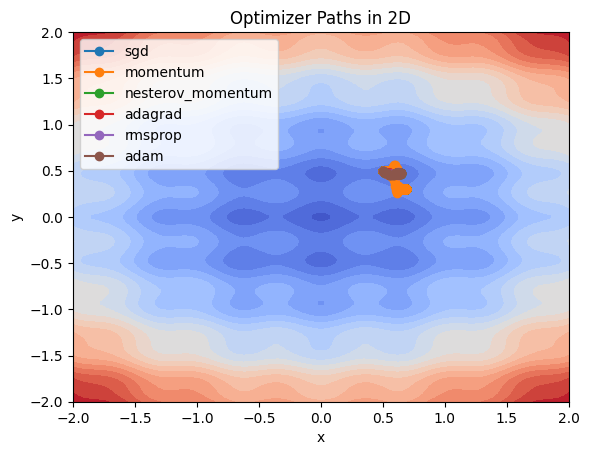

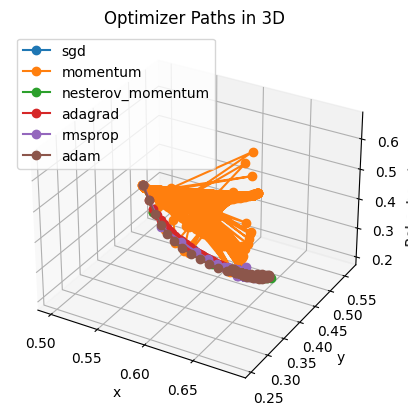

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining the Bohachevsky Function
def bohachevsky(p):
    x, y = p
    term1 = x**2
    term2 = 2 * y**2
    term3 = -0.3 * np.cos(3 * np.pi * x)
    term4 = -0.4 * np.cos(4 * np.pi * y)
    return term1 + term2 + term3 + term4

# Defining the gradient of the Bohachevsky Function (Numerical Approximation)
def gradient_bohachevsky(p, delta=1e-6):
    grad_x = 2 * p[0] + 0.9 * np.pi * np.sin(3 * np.pi * p[0])
    grad_y = 4 * p[1] + 1.6 * np.pi * np.sin(4 * np.pi * p[1])
    return np.array([grad_x, grad_y])

# Optimizer functions
def sgd(p, lr, grad):
    return p - lr * grad

def momentum(p, lr, grad, prev_momentum, beta):
    momentum = beta * prev_momentum + lr * grad
    return p - momentum

def nesterov_momentum(p, lr, grad, prev_momentum, beta):
    lookahead_momentum = prev_momentum * beta + lr * gradient_bohachevsky(p - beta * prev_momentum)
    return p - lookahead_momentum

def adagrad(p, lr, grad, G, epsilon):
    G += np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * np.square(grad)
    return p - (lr / np.sqrt(G + epsilon)) * grad

def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    return p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

def optimize(optimizer, lr, initial_p, target_error, max_steps, beta=0.9, decay=0.9):
    p = initial_p
    grad = gradient_bohachevsky(p)
    steps = 0
    epsilon = 1e-7

    if optimizer == adagrad or optimizer == rmsprop:
        G = np.zeros_like(grad)

    if optimizer == adam:
        m = np.zeros_like(grad)
        v = np.zeros_like(grad)
        beta1 = 0.9
        beta2 = 0.999
        t = 0

    prev_momentum = 0
    result_path = [p]

    while steps < max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * np.square(grad)
            t += 1
            m_hat = m / (1 - beta1 ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        elif optimizer == adagrad:
            p = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            G = decay * G + (1 - decay) * np.square(grad)
            p = p - (lr / np.sqrt(G + epsilon)) * grad

        elif optimizer == momentum:
            p = optimizer(p, lr, grad, prev_momentum, beta)
            prev_momentum = p - prev_p

        elif optimizer == nesterov_momentum:
            lookahead_momentum = prev_momentum * beta + lr * gradient_bohachevsky(p - beta * prev_momentum)
            p = p - lookahead_momentum
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

        grad = gradient_bohachevsky(p)
        steps += 1

        result_path.append(p)

        # Stopping criterion
        if np.linalg.norm(prev_grad) < target_error:
            break

    return result_path, steps

# Visualizations
def plot_trajectory_1d(paths):
    plt.figure()
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [i] * len(result_path)
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.title('Optimizer Paths in 1D')
    plt.legend()
    plt.show()

def plot_trajectory_2d(paths):
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = bohachevsky((X, Y))

    plt.figure()
    plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        plt.plot(x, y, 'o-', label=optimizer)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimizer Paths in 2D')
    plt.legend()
    plt.show()

def plot_trajectory_3d(paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, (optimizer, result_path) in enumerate(paths):
        x = [p[0] for p in result_path]
        y = [p[1] for p in result_path]
        z = [bohachevsky(p) for p in result_path]
        ax.plot(x, y, z, 'o-', label=optimizer)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Bohachevsky(x, y)')
    ax.set_title('Optimizer Paths in 3D')
    ax.legend()
    plt.show()

# Initial point and stopping criterion
initial_point = np.array([0.5, 0.5])
target_error = 1e-13
max_steps = 10000

optimizers = [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]

optimizer_paths_1d = []
optimizer_paths_2d = []
optimizer_paths_3d = []

#Printing the results
for optimizer in optimizers:
    result_path, steps = optimize(optimizer, 0.01, initial_point, target_error, max_steps, beta=0.9, decay=0.9)
    print(f"{optimizer.__name__}: Minimized Bohachevsky = {bohachevsky(result_path[-1])}, Steps = {steps}")
    optimizer_paths_1d.append((optimizer.__name__, result_path))
    optimizer_paths_2d.append((optimizer.__name__, result_path))
    optimizer_paths_3d.append((optimizer.__name__, result_path))

#Plotting 1D, 2D and 3D plots
plot_trajectory_1d(optimizer_paths_1d)
plot_trajectory_2d(optimizer_paths_2d)
plot_trajectory_3d(optimizer_paths_3d)
